<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [1]:
def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    tree = Graph()
    pending = []
    
    for i in G.nodes():    #O(V) número de nodos
        G.node[i].update({'prev':None})    #O(1)
        
    if origin != None:    
        nodo = origin    #O(1)
    else:    
        nodo = G.nodes()[0]    #O(1)
        
    pending.append((0,nodo,G.node[nodo]['prev']))
    
    while len(pending)>0:
        aux = min(pending)   #O(V)
        nodo = aux[1]    #O(1)
        prev = aux[2]    #O(1)
        
        if nodo not in tree.nodes():
            tree.add_node(nodo,G.node[nodo].copy())    #O(1)
            G.node[nodo]['prev'] = prev    #O(1)
            
            if nodo != G.nodes()[0]:
                tree.add_edge(nodo,G.node[nodo]['prev'],G.edge[nodo][G.node[nodo]['prev']].copy())    #O(1)

            for x in G.neighbors(nodo):    #O(E) número de aristas
                if x not in tree.nodes():
                    pending.append((G.edge[nodo][x]['distance'],x,nodo))    #O(1)
     
        pending.remove(aux)    #O(V)
        
    return tree

In [2]:
from graph import Graph
from util import *

G, lines = get_subway_graph('csv', Graph)
GMST = prim(G)

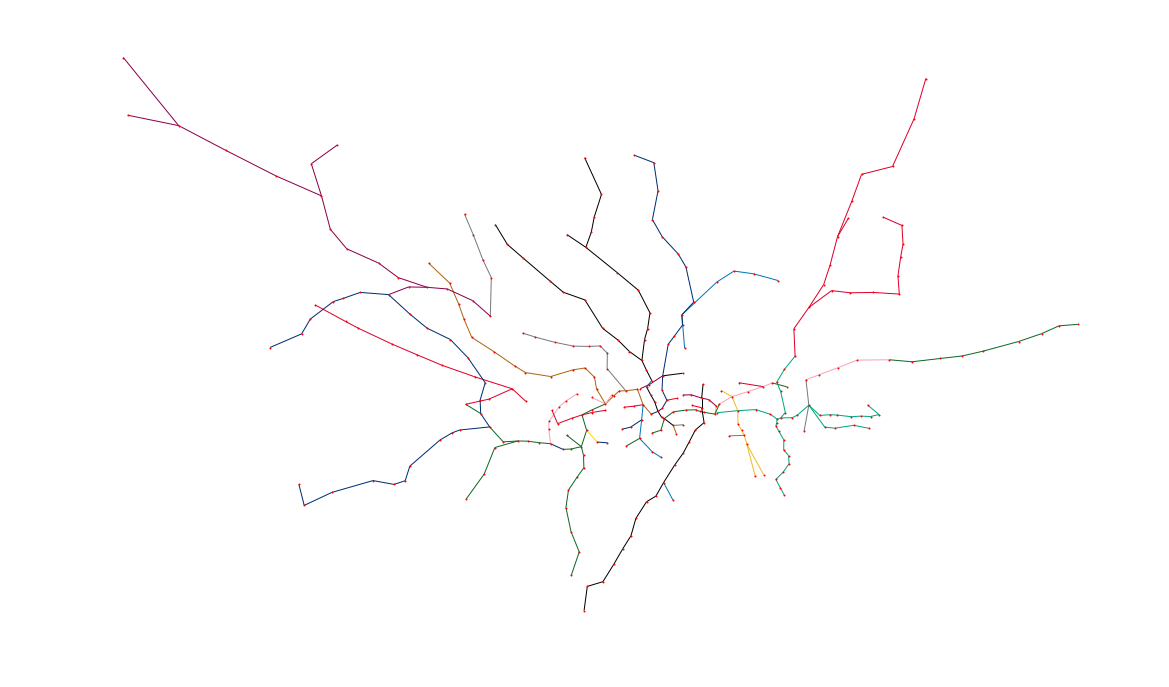

In [3]:
# METRO DE LONDRES MST
draw_subway_graph(GMST, lines, figsize=(20,12))

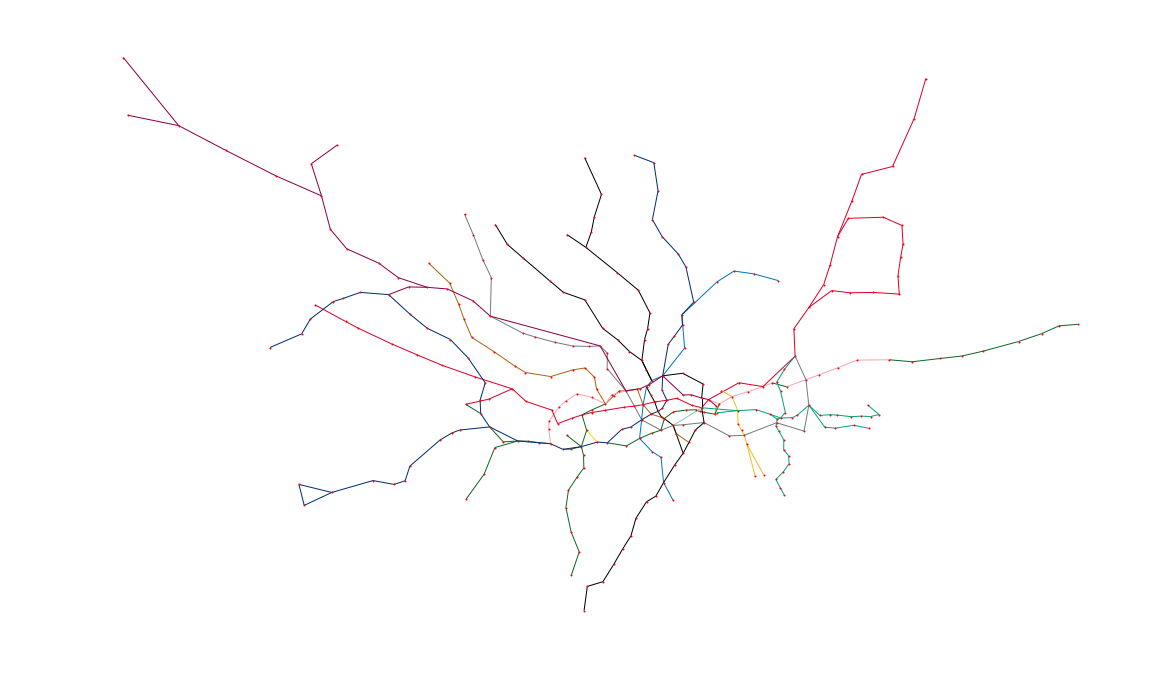

In [4]:
# METRO DE LONDRES NORMAL
draw_subway_graph(G, lines, figsize=(20,12))

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Para realizar este algoritmo, debiamos escoger un nodo inicial y mirar si estaba en el grafo Tree que hemos creado al inicio, si no lo está, lo añadimos al arbol y visitamos sus vecinos, donde añadiremos a la cola de pending una tupla de 3 elementos:  (dist_arista,nodo,nodo_que_lo_visita), ya que si asignaba el previo cuando añadia los vecinos a la lista, consideraba el nodo con el último previo que lo visitaba, y calculaba mal la distancia, en ese caso haciendolo de este modo me aseguro que el nodo con el que visitamos, le asignamos el previo correcto.
Para escoger el siguiente nodo a visitar, miramos el que tenga la distancia mínima de la arista en el pending, así hasta que hayamos añadido a nuestro grafo Tree todos los nodos del grafo G, lo que significa que habremos añadido todas las aristas con mínima distancia sin crear ciclos.


Complejidad de prim: 

1 + V(buscar mínimo en pending) + V(eliminar mínimo en pending) + V*E(visitar todas las aristas de todos los nodos) = O(|V * E|)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>